# 신경망학습

In [1]:
import numpy as np
import sys, os

In [2]:
#손실함수
def mean_square_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

a = np.array([0, 1, 0, 1, 1])
b = np.array([0.1, 0.4, 0.1, 0.5, 0.7])

print(a - b)
print(mean_square_error(a, b))


#크로스 엔트로피 함수
#분류한 클래스에만 한정해서 실제값과 판단한 클래스값을 비교
#클래스 -> [0, 1, 0, 0, 1, 0] : One-hot 코딩
def cross_entropy_error_normal(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # 여기서 델타는 y가 0인 경우를 대비하기 위함

[-0.1  0.6 -0.1  0.5  0.3]
0.36


In [6]:
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
def cross_entropy_error_batch(y, t):
    # y는 출력값
    # t는 정답라벨
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

## 미분 예시

In [8]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

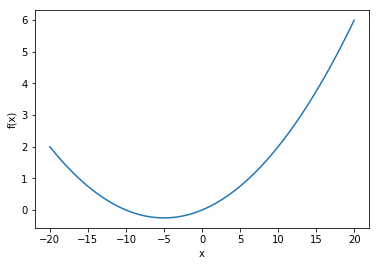

In [10]:
import matplotlib.pylab as plt

x = np.arange(-20.0, 20.0, 0.01)
y = function_1(x)


plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [11]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## 편미분

In [12]:
# f(x0, x1) = X0^2 + x1^2
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x**2)

# x0 = 3, x1 = 4일떄 x0에 대한 편미분
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

print(numerical_diff(function_tmp1, 3.0))

# x0 = 3, x1 = 4일때 x1에 대한 편미분
def function_tmp2(x1):
    return 3.0*3.0 + x1 ** 2.0

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 기울기

In [13]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        hx1 = f(x)
        
        x[idx] = tmp_val - h
        hx2 = f(x)
        
        grad[idx] = (hx1 - hx2) / (2*h)
        
        # x[idx]값을 복원
        x[idx] = tmp_val
    
    return grad

In [14]:
numerical_gradient(function_2, np.array([1.0,2.0]))

array([ 2.,  4.])

## 경사법

[ -6.11110793e-10   8.14814391e-10]


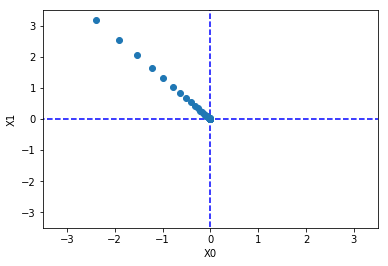

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for idx in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

result, history = gradient_descent(function_2, np.array([-3.0, 4.0]), 0.1)
print(result)

# 그래프 그리기
import matplotlib.pylab as contour_chart
contour_chart.plot([-5, 5], [0, 0], "--b")
contour_chart.plot([0, 0], [-5, 5], "--b")
contour_chart.plot(history[:,0], history[:,1], "o")
contour_chart.xlim(-3.5, 3.5)
contour_chart.ylim(-3.5, 3.5)
contour_chart.xlabel("X0")
contour_chart.ylabel("X1")
contour_chart.show()

In [16]:
import sys, os

sys.path.append(os.pardir)
import numpy as np


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
       return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        